In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import skimage as ski

## Convolucion

In [2]:
def show_filter(imagen, filtro,bias=0,data=False):
    imagen_list = []
    for d in range(3):
        temp = sp.signal.convolve2d(imagen[:,:,d] , filtro,  boundary='symm',mode='same') #Se le aplica el filtro a cada una de las capas de la imagen
        imagen_list.append(temp + bias) #Se guardan las capas en una lista

    imagen_filt = np.stack(imagen_list, axis=2) #Se apilan las capas de la imagen en un arreglo de 3 dimensiones(Se reconstruye la imagen pero con el filtro)
    imagen_filt[imagen_filt > 255] = 255 #Se ajustan los valores de la imagen para que esten en el rango de 0 a 255
    imagen_filt[imagen_filt < 0] = 0
    imagen_filt = imagen_filt.astype("uint8") #Se convierte la imagen a tipo de dato uint8

    plt.figure(figsize=(16, 5))
    plt.subplot(1,2,1)
    ski.io.imshow(imagen_filt)
    if data == True:
        return imagen_filt

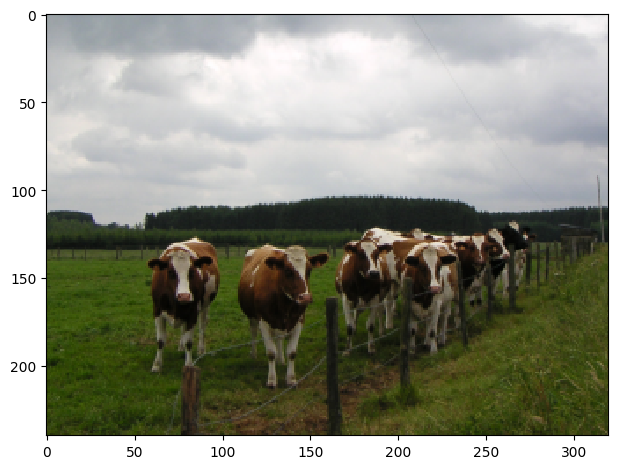

In [3]:
imagen = ski.io.imread("photo2.png")#Puede cambiarla por cualquiera de la carpeta
ski.io.imshow(imagen)

In [4]:
filter = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
filter

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 0]])

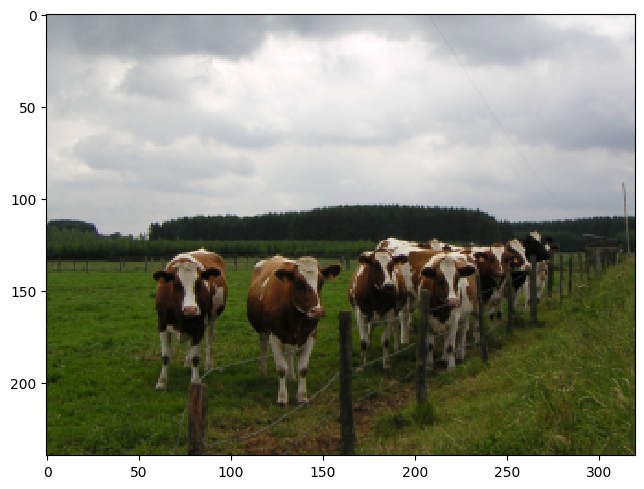

In [5]:
show_filter(imagen, filter) #No hace nada a la imagen, igual era para verificar que la funcion funcionara :)

## Blur

In [6]:
blur_filter = np.array([[0, 0.2, 0], [0.2, 0.2, 0.2], [0, 0.2, 0]])
blur_filter

array([[0. , 0.2, 0. ],
       [0.2, 0.2, 0.2],
       [0. , 0.2, 0. ]])

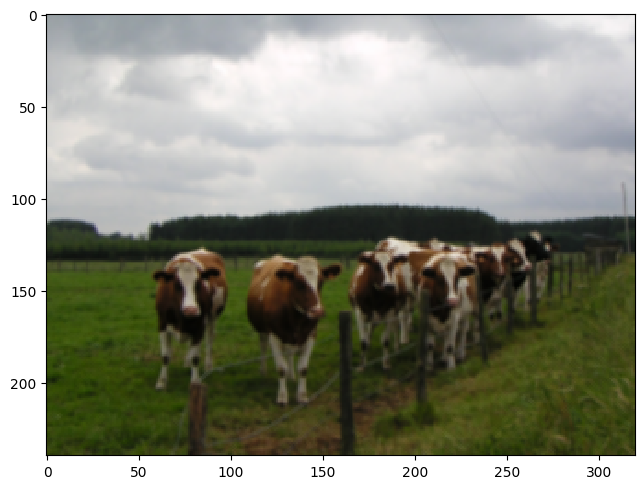

In [7]:
show_filter(imagen, blur_filter) #Al ser de tamaño 3x3 el desenfoque no es muy fuerte

In [8]:
blur_filter5x5 = np.array([
  [0, 0, 1, 0, 0],
  [0, 1, 1, 1, 0],
  [1, 1, 1, 1, 1],
  [0, 1, 1, 1, 0],
  [0, 0, 1, 0, 0]
])
blur_filter5x5 = blur_filter5x5 / np.sum(blur_filter5x5)
blur_filter5x5

array([[0.        , 0.        , 0.07692308, 0.        , 0.        ],
       [0.        , 0.07692308, 0.07692308, 0.07692308, 0.        ],
       [0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308],
       [0.        , 0.07692308, 0.07692308, 0.07692308, 0.        ],
       [0.        , 0.        , 0.07692308, 0.        , 0.        ]])

Se hace que la suma de todos los elementos sea uno debido a que si la suma es mayor que uno dara como resultado una imagen mas brillante que la original, si es cero sera mucho mas oscura

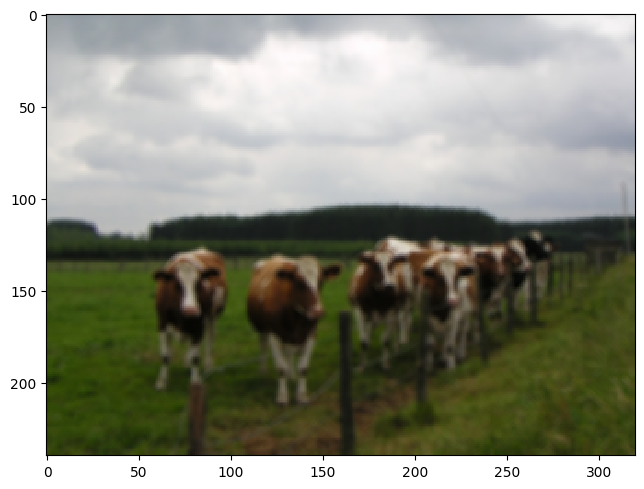

In [9]:
show_filter(imagen, blur_filter5x5) #Al ser de tamaño 5x5 el desenfoque es mas fuerte

## Gaussian Blur

In [10]:
gau_filter = np.array([
  [1, 2, 1],
  [2, 4, 2],
  [1, 2, 1]
])
gau_filter = gau_filter / np.sum(gau_filter)
gau_filter

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

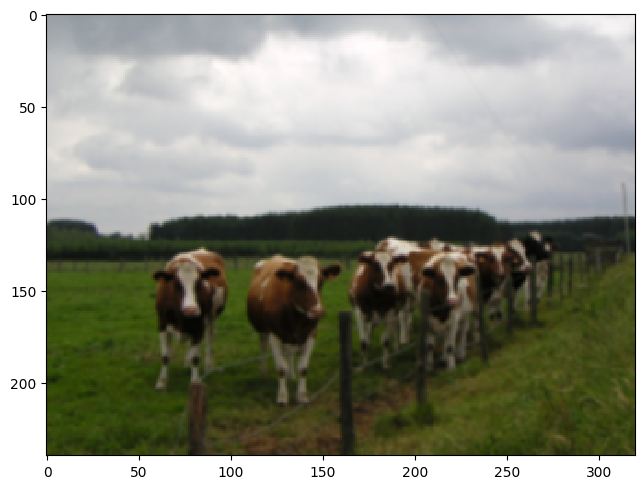

In [11]:
show_filter(imagen, gau_filter) 

In [12]:
gau_filter5x5 = np.array([
  [1,  4,  6,  4, 1],
  [4, 16, 24, 16, 4],
  [6, 24, 36, 24, 6],
  [4, 16, 24, 16, 4],
  [1,  4,  6,  4, 1]
])
gau_filter5x5 = gau_filter5x5 / np.sum(gau_filter5x5)
gau_filter5x5

array([[0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.0234375 , 0.09375   , 0.140625  , 0.09375   , 0.0234375 ],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625]])

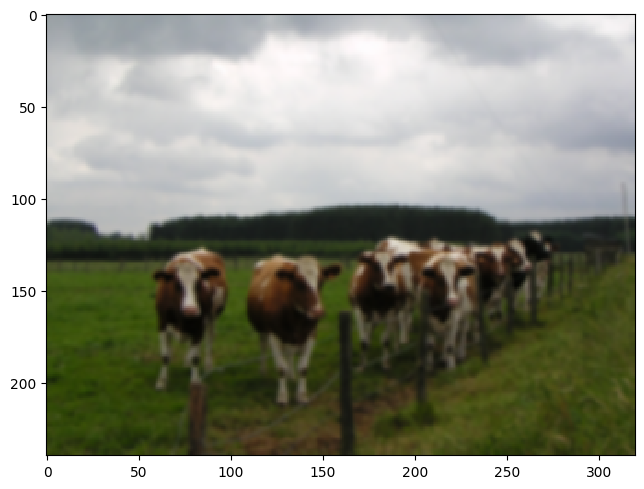

In [13]:
show_filter(imagen, gau_filter5x5) 

## Motion Blur

In [14]:
mblur_filter = np.array([

  [1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 1, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 1]
])
mblur_filter = mblur_filter / np.sum(mblur_filter)
mblur_filter

array([[0.11111111, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.11111111, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.11111111, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.11111111, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.11111111,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.11111111, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.11111111, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.11111111, 0.        ],


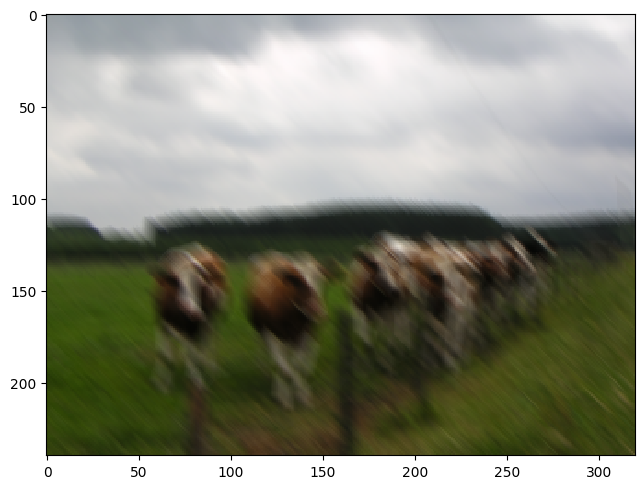

In [15]:
show_filter(imagen, mblur_filter)

## Find Edges

In [16]:
fehor_filter = np.array([ #Filtro de deteccion de bordes horizontales
   [0,  0, -1,  0,  0],
   [0,  0, -1,  0,  0],
   [0,  0,  2,  0,  0],
   [0,  0,  0,  0,  0],
   [0,  0,  0,  0,  0]
])
fehor_filter

array([[ 0,  0, -1,  0,  0],
       [ 0,  0, -1,  0,  0],
       [ 0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0]])

La razón por la que este filtro puede encontrar bordes horizontales, es que la operación de convolución con este filtro puede verse como una especie de versión discreta de la derivada: se toma el píxel actual y se le resta el valor del anterior, con lo que se obtiene un valor que representa la diferencia entre esos dos o la pendiente de la función.

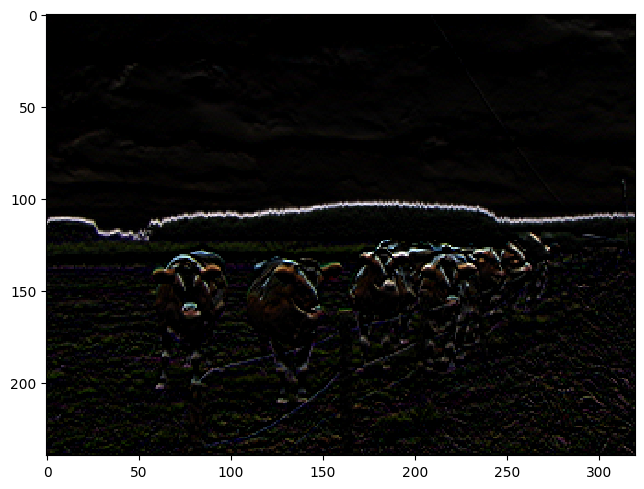

In [17]:
show_filter(imagen, fehor_filter)

In [18]:
fever_filter = np.array([ #Filtro de deteccion de bordes verticales
   [0,  0, -1,  0,  0],
   [0,  0, -1,  0,  0],
   [0,  0,  4,  0,  0],
   [0,  0, -1,  0,  0],
   [0,  0, -1,  0,  0]
])
fever_filter

array([[ 0,  0, -1,  0,  0],
       [ 0,  0, -1,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0, -1,  0,  0],
       [ 0,  0, -1,  0,  0]])

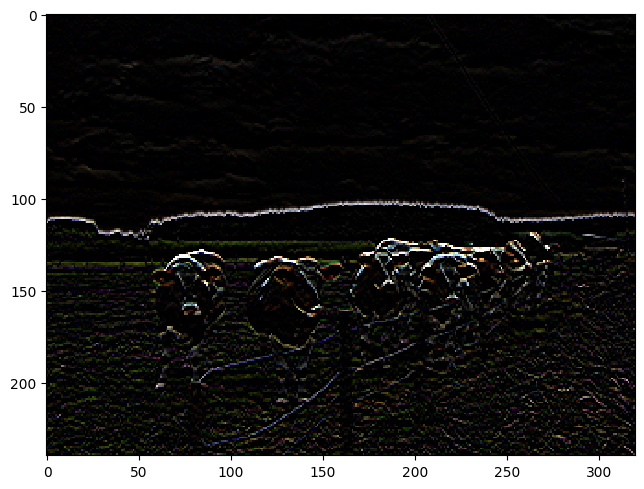

In [19]:
show_filter(imagen, fever_filter)

In [20]:
fe45_filter = np.array([ #Filtro de deteccion de bordes a 45 grados
  [-1,  0,  0,  0,  0],
  [ 0, -2,  0,  0,  0],
  [ 0,  0,  6,  0,  0],
  [ 0,  0,  0, -2,  0],
  [ 0,  0,  0,  0, -1]
])
fe45_filter

array([[-1,  0,  0,  0,  0],
       [ 0, -2,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  0,  0, -2,  0],
       [ 0,  0,  0,  0, -1]])

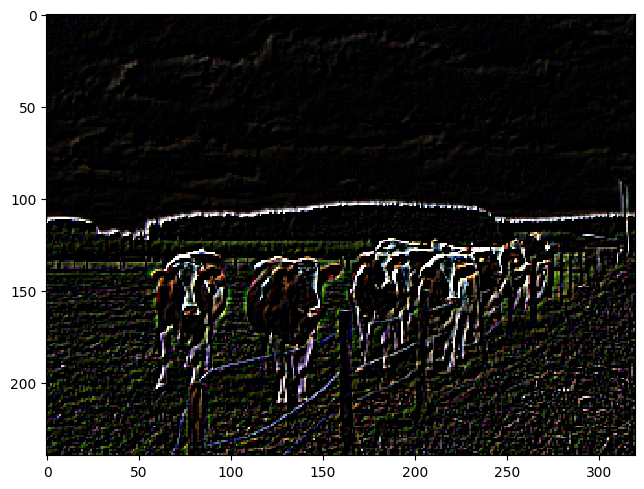

In [21]:
show_filter(imagen, fe45_filter)

In [22]:
feall_filter = np.array([ #Filtro de deteccion de bordes en todas las direcciones
 [-1, -1, -1],
 [-1,  8, -1],
 [-1, -1, -1]
])
feall_filter

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

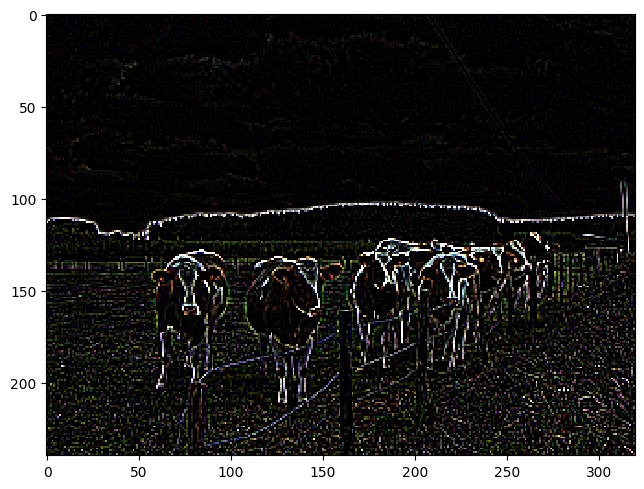

In [23]:
show_filter(imagen, feall_filter)

## Sharpen

Para usar el filtro "Sharpen" en la imagen es muy similar al de "Find Edges", se superpone la imagen original, y la imagen después de la detección de bordes y el resultado será una nueva imagen en la que los bordes se han mejorado, por lo que parece más "Afilada".

In [24]:
sh_filter = np.array([
  [-1, -1, -1],
  [-1,  9, -1],
  [-1, -1, -1]
])
sh_filter

array([[-1, -1, -1],
       [-1,  9, -1],
       [-1, -1, -1]])

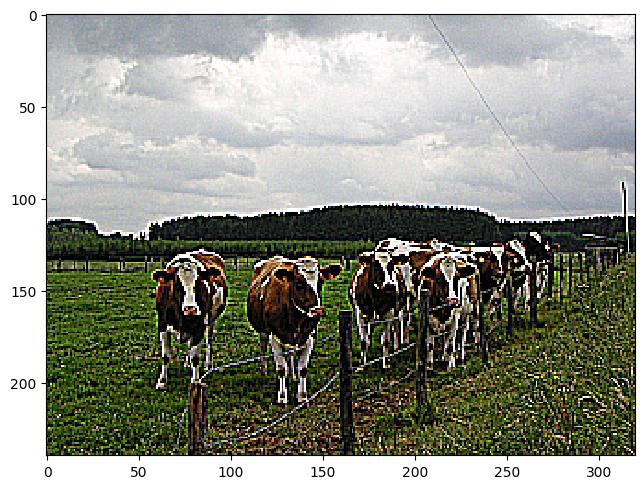

In [25]:
show_filter(imagen, sh_filter)

In [26]:
shs_filter = np.array([ #Muestra los bordes menos marcados
  [-1, -1, -1, -1, -1],
  [-1,  2,  2,  2, -1],
  [-1,  2,  8,  2, -1],
  [-1,  2,  2,  2, -1],
  [-1, -1, -1, -1, -1]
])
shs_filter = shs_filter / np.sum(shs_filter)
shs_filter

array([[-0.125, -0.125, -0.125, -0.125, -0.125],
       [-0.125,  0.25 ,  0.25 ,  0.25 , -0.125],
       [-0.125,  0.25 ,  1.   ,  0.25 , -0.125],
       [-0.125,  0.25 ,  0.25 ,  0.25 , -0.125],
       [-0.125, -0.125, -0.125, -0.125, -0.125]])

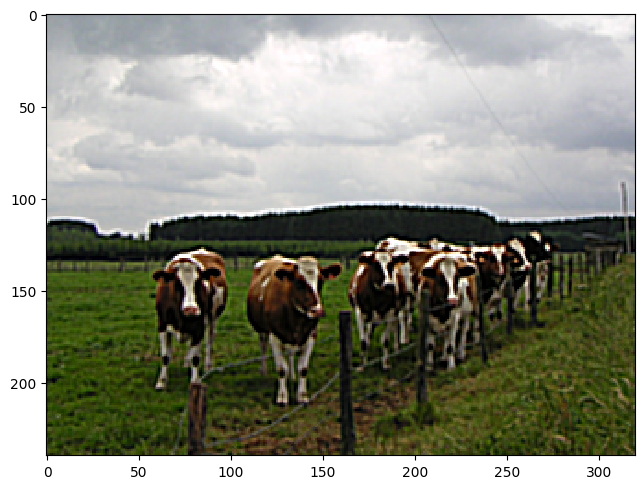

In [27]:
show_filter(imagen, shs_filter)

In [28]:
shh_filter = np.array([ #Muestra los bordes mas marcados
   [1,  1,  1],
   [1, -7,  1],
   [1,  1,  1]
])
shh_filter

array([[ 1,  1,  1],
       [ 1, -7,  1],
       [ 1,  1,  1]])

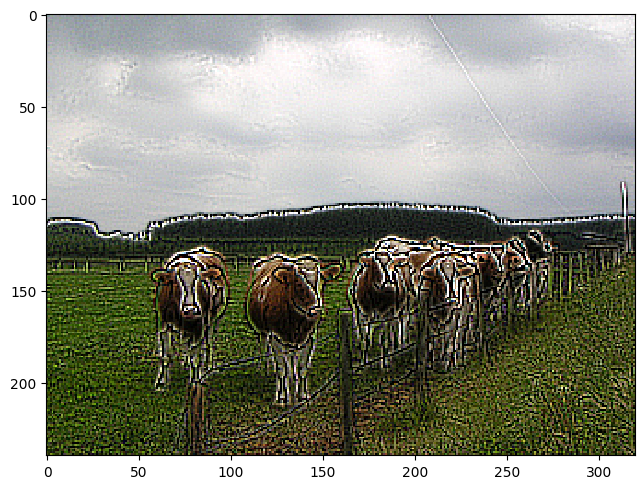

In [29]:
show_filter(imagen, shh_filter)

## Emboss

Le da un efecto de sombra 3D a la imagen

In [30]:
emb45_filter = np.array([ #Filtro de relieve a 45 grados
  [-1, -1,  0],
  [-1,  0,  1],
  [ 0,  1,  1]
])
emb45_filter

array([[-1, -1,  0],
       [-1,  0,  1],
       [ 0,  1,  1]])

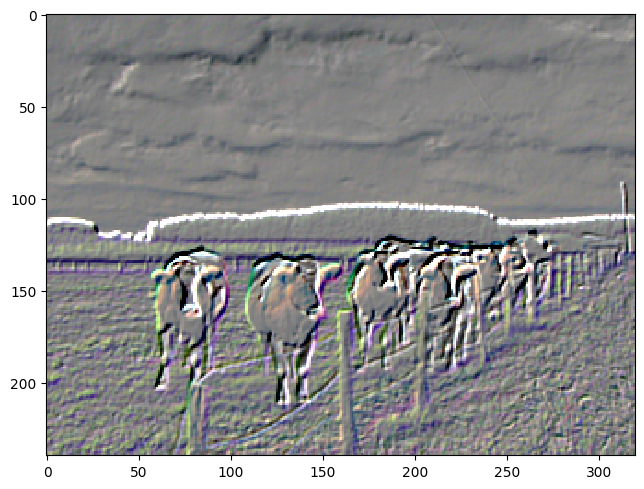

In [31]:
img = show_filter(imagen, emb45_filter,128,True) #Se guarda la imagen con el filtro aplicado

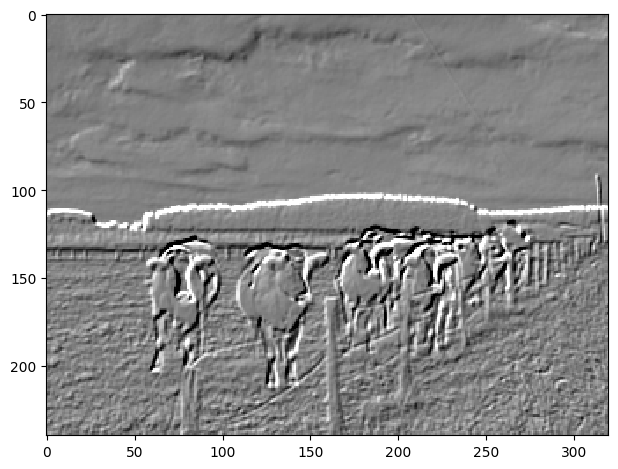

In [32]:
img = ski.color.rgb2gray(img) #Se convierte la imagen a escala de grises
ski.io.imshow(img) #Se muestra la imagen con el filtro aplicado
#Si realmente se desea obtener un "Bump map" se deberia transformar la imagen a escala de grises

In [33]:
emb_filter = np.array([ #Filtro de relieve mas exagerado
  [-1, -1, -1, -1,  0],
  [-1, -1, -1,  0,  1],
  [-1, -1,  0,  1,  1],
  [-1,  0,  1,  1,  1],
  [ 0,  1,  1,  1,  1]
])
emb_filter

array([[-1, -1, -1, -1,  0],
       [-1, -1, -1,  0,  1],
       [-1, -1,  0,  1,  1],
       [-1,  0,  1,  1,  1],
       [ 0,  1,  1,  1,  1]])

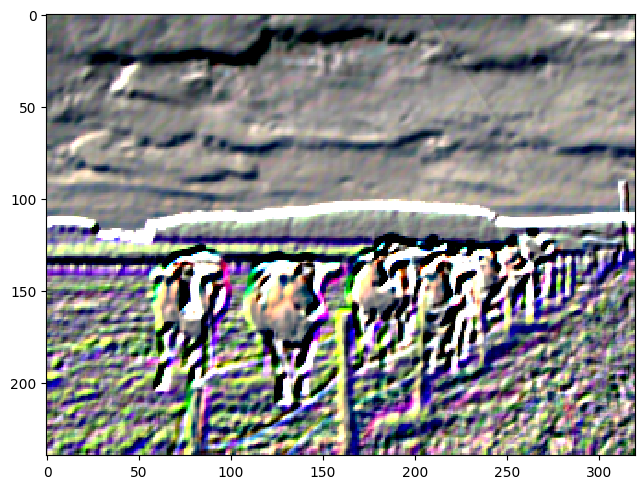

In [34]:
show_filter(imagen, emb_filter,128)

## Mean Filter

Comunmente se utiliza para eliminar ruido

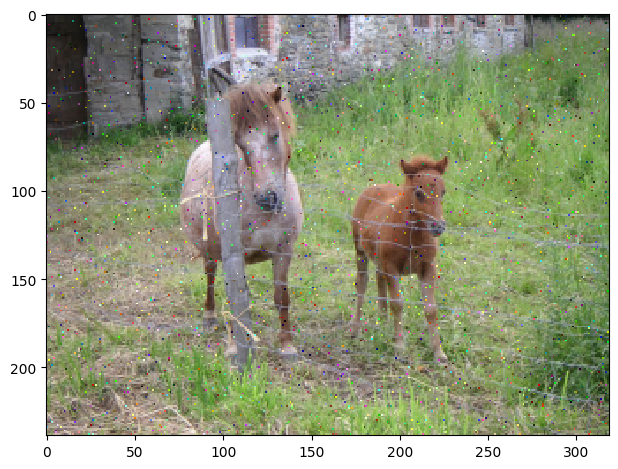

In [35]:
imagen_noisy = ski.io.imread("noise.png")
ski.io.imshow(imagen_noisy) 

In [36]:
mean_filter = np.array([ #Filtro de promedio
  [1, 1, 1],
  [1, 1, 1],
  [1, 1, 1]
])
mean_filter = mean_filter / np.sum(mean_filter)
mean_filter

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

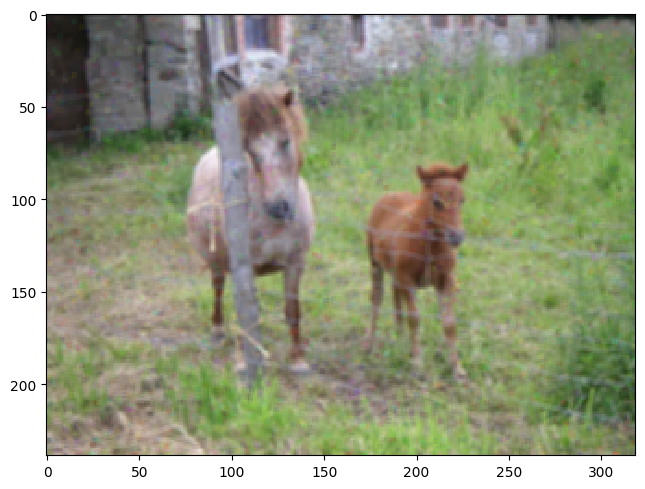

In [37]:
show_filter(imagen_noisy, mean_filter)